In [1]:
import pandas as pd
df=pd.read_csv('D:\Projects\Stock market prediction\HDB.csv')

In [2]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,HDB,2018-05-10 00:00:00+00:00,96.51,97.04,95.68,95.84,1827337,46.570789,46.826540,46.170273,46.247481,3654674,0.0,1.0
1,HDB,2018-05-11 00:00:00+00:00,99.53,99.86,97.51,97.51,1140210,48.028087,48.187328,47.053338,47.053338,2280420,0.0,1.0
2,HDB,2018-05-14 00:00:00+00:00,99.95,100.72,99.33,99.52,1484878,48.230757,48.602320,47.931577,48.023261,2969756,0.0,1.0
3,HDB,2018-05-15 00:00:00+00:00,99.49,99.69,98.32,99.29,1008984,48.008785,48.105294,47.444202,47.912275,2017968,0.0,1.0
4,HDB,2018-05-16 00:00:00+00:00,98.58,99.20,98.42,99.20,556101,47.569665,47.868845,47.492457,47.868845,1112202,0.0,1.0


In [3]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,HDB,2023-05-02 00:00:00+00:00,69.55,70.05,69.19,69.95,832103,69.55,70.05,69.19,69.95,832103,0.0,1.0
1253,HDB,2023-05-03 00:00:00+00:00,69.50,70.43,69.45,69.88,954172,69.50,70.43,69.45,69.88,954172,0.0,1.0
1254,HDB,2023-05-04 00:00:00+00:00,68.52,71.01,68.16,70.49,5036260,68.52,71.01,68.16,70.49,5036260,0.0,1.0
1255,HDB,2023-05-05 00:00:00+00:00,67.02,67.16,65.72,66.99,3550564,67.02,67.16,65.72,66.99,3550564,0.0,1.0
1256,HDB,2023-05-08 00:00:00+00:00,67.12,68.29,67.10,67.96,2133714,67.12,68.29,67.10,67.96,2133714,0.0,1.0


In [4]:
df1=df.reset_index()['close']

In [5]:
df1

0       96.51
1       99.53
2       99.95
3       99.49
4       98.58
        ...  
1252    69.55
1253    69.50
1254    68.52
1255    67.02
1256    67.12
Name: close, Length: 1257, dtype: float64

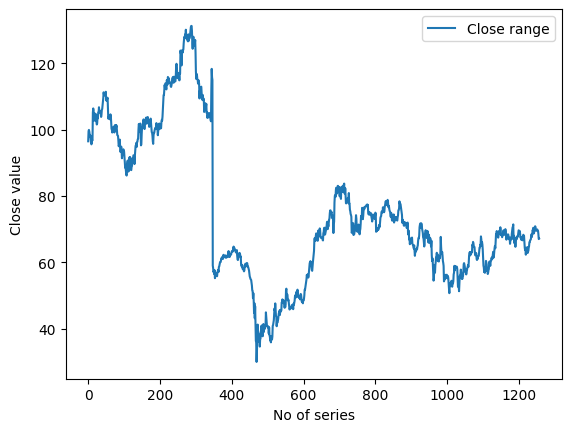

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.xlabel("No of series")
plt.ylabel("Close value")
plt.legend(["Close range"])

In [7]:
import numpy as np

In [8]:
df1

0       96.51
1       99.53
2       99.95
3       99.49
4       98.58
        ...  
1252    69.55
1253    69.50
1254    68.52
1255    67.02
1256    67.12
Name: close, Length: 1257, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.65663542]
 [0.68643315]
 [0.69057721]
 ...
 [0.38046374]
 [0.36566354]
 [0.36665022]]


In [11]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(817, 440)

In [13]:
train_data

array([[0.65663542],
       [0.68643315],
       [0.69057721],
       [0.68603848],
       [0.67705969],
       [0.67054761],
       [0.67459299],
       [0.6625555 ],
       [0.65219536],
       [0.64755797],
       [0.65140602],
       [0.66087815],
       [0.65969413],
       [0.74208189],
       [0.75441539],
       [0.74770597],
       [0.71800691],
       [0.72244697],
       [0.7399112 ],
       [0.73606315],
       [0.71840158],
       [0.72708436],
       [0.73695116],
       [0.71376418],
       [0.70656142],
       [0.71040947],
       [0.73053774],
       [0.72501233],
       [0.74218056],
       [0.74227923],
       [0.75796744],
       [0.74691663],
       [0.74642329],
       [0.74208189],
       [0.74671929],
       [0.74060187],
       [0.72925506],
       [0.73576714],
       [0.75096201],
       [0.75244203],
       [0.76378885],
       [0.77740503],
       [0.78549581],
       [0.80236803],
       [0.7950666 ],
       [0.79634928],
       [0.79851998],
       [0.799

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf


In [20]:
def build_LSTM_model():
    input = tf.keras.layers.Input(
        shape=(X_train.shape[1], 1), name ="input"
    )
    x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True))(input)
       
    x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences=False, dropout=0.5))(x)
    
    x = tf.keras.layers.Dense(25 , activation="softmax")(x)
    
    output = tf.keras.layers.Dense(1)(x)
               
    model = tf.keras.Model(inputs=input, outputs=output, name="BI_LSTM")
    
    return model

model = build_LSTM_model()
model.summary()

Model: "BI_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100, 1)]          0         
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         133120    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 300,723
Trainable params: 300,723
Non-trainab

In [21]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 18s 784ms/step - loss: 0.1687 - accuracy: 0.0014 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 7s 558ms/step - loss: 0.0677 - accuracy: 0.0014 - val_loss: 0.0217 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 7s 575ms/step - loss: 0.0655 - accuracy: 0.0014 - val_loss: 0.0246 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 7s 586ms/step - loss: 0.0654 - accuracy: 0.0014 - val_loss: 0.0206 - val_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 7s 549ms/step - loss: 0.0652 - accuracy: 0.0014 - val_loss: 0.0198 - val_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 7s 546ms/step - loss: 0.0651 - accuracy: 0.0014 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 6s 529ms/step - loss: 0.0642 - accuracy: 0.0014 - val_loss: 0.02

In [23]:
import tensorflow as tf

In [24]:
tf.__version__

'2.12.0'

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 83ms/step


In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

82.39436791614214

In [28]:
math.sqrt(mean_squared_error(ytest,test_predict))

63.810619383806355

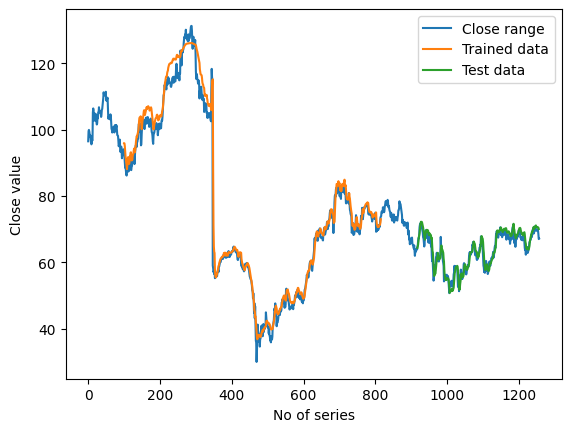

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel("No of series")
plt.ylabel("Close value")
plt.legend(["Close range","Trained data","Test data"])
plt.show()

In [30]:
len(test_data)

440

In [36]:
x_input=test_data[340:].reshape(1,-1)#341
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input


[0.3919092254563395,
 0.38776517020226936,
 0.3781943759250124,
 0.38421312284163794,
 0.3826344351258016,
 0.39516526887025166,
 0.3882585101134682,
 0.3759250123334978,
 0.36388751850024664,
 0.37296497286630487,
 0.3708929452392698,
 0.37908238776517017,
 0.3793783917118894,
 0.37927972372964974,
 0.37375431672422305,
 0.36507153428712374,
 0.36941292550567345,
 0.36941292550567345,
 0.35145535273803646,
 0.36132215096201276,
 0.36250616674888997,
 0.37059694129255055,
 0.3654662062160829,
 0.38174642328564384,
 0.38963986186482485,
 0.3999013320177602,
 0.40246669955599407,
 0.40927479033053765,
 0.3647755303404046,
 0.37543167242229897,
 0.35333004440059196,
 0.3555994079921065,
 0.3690182535767143,
 0.3425752343364578,
 0.3664528860384804,
 0.3702022693635915,
 0.3645781943759249,
 0.3673408978786384,
 0.3739516526887025,
 0.37187962506166755,
 0.37503700049333993,
 0.3843117908238776,
 0.39161322150962014,
 0.39082387765170196,
 0.3874691662555501,
 0.3894425259003454,
 0.383325

In [39]:
# demonstrate prediction for next 30 days
from numpy import array

In [40]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.38383192]
101
1 day input [0.38776517 0.37819438 0.38421312 0.38263444 0.39516527 0.38825851
 0.37592501 0.36388752 0.37296497 0.37089295 0.37908239 0.37937839
 0.37927972 0.37375432 0.36507153 0.36941293 0.36941293 0.35145535
 0.36132215 0.36250617 0.37059694 0.36546621 0.38174642 0.38963986
 0.39990133 0.4024667  0.40927479 0.36477553 0.37543167 0.35333004
 0.35559941 0.36901825 0.34257523 0.36645289 0.37020227 0.36457819
 0.3673409  0.37395165 0.37187963 0.375037   0.38431179 0.39161322
 0.39082388 0.38746917 0.38944253 0.38332511 0.37000493 0.37109028
 0.36378885 0.36605821 0.37178096 0.36250617 0.36201283 0.3725703
 0.37849038 0.37464233 0.375333   0.35737543 0.34000987 0.33260977
 0.33951653 0.31919092 0.33478046 0.32747903 0.33330044 0.34168722
 0.32412432 0.33014307 0.32984706 0.33961519 0.34435126 0.35619142
 0.35638875 0.36221016 0.36309817 0.36507153 0.37483966 0.38016774
 0.37207696 0.38125308 0.39269857 0.38973853 0.39930932 0.38204243
 0.38450913 0.39467193 0.39348791 

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [42]:
import matplotlib.pyplot as plt
len(df1)

1257

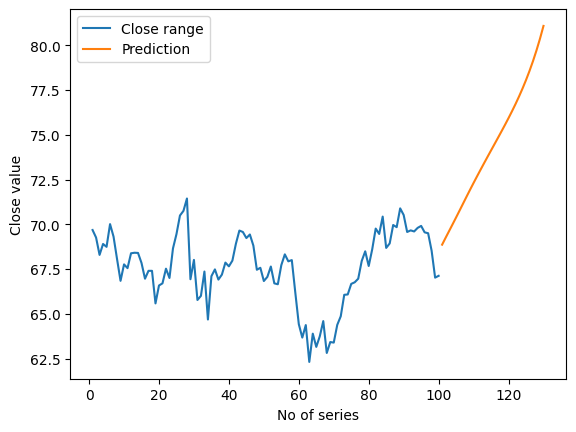

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))#1158
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel("No of series")
plt.ylabel("Close value")
plt.legend(["Close range","Prediction"])